<a href="https://colab.research.google.com/github/JanisJ2/JSC270/blob/main/JSC270_2024_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1: DELVE COVID data

## Learning objectives:

1.   Understanding the DELVE COVID-19 dataset and how it is displayed in the current notebook
2.   Modifying code to update figures
3.   Reading in, wrangling, and plotting data on your own!

# Part I: DELVE COVID-19 Data Visualization (20 pts)

###Go to https://rs-delve.github.io/data_software/global-dataset.html and read about the DELVE Global COVID-19 Dataset.

###Open the python notebook which was used to produce the data exploration on the DELVE website ([here](https://colab.research.google.com/github/rs-delve/covid19_datasets/blob/master/Data_Exploration.ipynb)) and review the code that was used.

###Now read the DELVE data into colab
####Hint: double clicking on the code cells in the DELVE colab, it will show you the code (i.e. the notebook is set to hide the code), you can copy that cell's content ant paste it in the code cell below

In [10]:
#@title Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output, display
import ipywidgets as widgets
from datetime import datetime, date, timedelta

path = 'https://raw.githubusercontent.com/rs-delve/covid19_datasets/master/dataset/combined_dataset_latest.csv'
df = pd.read_csv(path, parse_dates=['DATE'])
# Get an overview of the dataset
df.head()

,ISO,DATE,country_name,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,...,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
0,ABW,2020-01-01,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17120.0,NaN,NaN,3.238519e-06,0.016900,220.264984,27.246809,26.732813,27.709375,9.019097
1,ABW,2020-01-02,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17120.0,NaN,NaN,6.755193e-07,0.016645,223.333893,27.049299,26.558985,27.508204,8.752604
2,ABW,2020-01-03,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17120.0,NaN,NaN,1.329184e-05,0.017244,220.742767,27.193014,26.695704,27.582422,8.564670
3,ABW,2020-01-04,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17120.0,NaN,NaN,1.788139e-07,0.016593,225.407074,27.267725,26.775782,27.771875,8.304688
4,ABW,2020-01-05,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17120.0,NaN,NaN,7.867813e-06,0.017142,219.864334,27.255766,26.965235,27.611719,5.604166


###Explore the columns of the dataframe using .describe()

In [12]:
# Print summary statistics
df.describe()

,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,npi_debt_relief,...,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
count,152853.000000,152841.000000,152842.000000,152791.000000,152814.000000,152790.000000,152791.000000,152822.000000,152769.000000,152775.000000,...,1.369400e+05,4232.000000,608.000000,37720.000000,37720.000000,37720.000000,37720.000000,37720.000000,37720.000000,37720.000000
mean,1.491047,1.379205,1.341006,2.525967,0.529094,0.957419,0.775419,2.340246,0.762877,0.847233,...,6.933605e+06,118.685821,824.492783,0.000036,0.011411,189.244193,19.340536,15.662197,23.382182,3.510201
std,1.125447,0.969666,0.788743,1.548291,0.687834,0.924409,0.895428,1.216564,0.765605,0.856614,...,2.096006e+07,242.809764,1698.439041,0.000068,0.005347,64.843065,9.008982,9.374045,9.188666,1.844418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.130000e+03,-298.634510,-2090.441573,0.000000,0.000382,0.240429,-28.269835,-36.281255,-19.346130,0.781301
25%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,4.656155e+05,-5.085714,-37.800000,0.000001,0.006594,156.161128,13.695513,9.219760,18.128939,2.255559
50%,1.000000,2.000000,2.000000,3.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,...,1.512602e+06,43.527889,301.363483,0.000011,0.011403,202.137401,21.727503,17.443256,26.173631,3.034009
75%,3.000000,2.000000,2.000000,4.000000,1.000000,2.000000,2.000000,3.000000,1.000000,2.000000,...,5.448268e+06,164.988925,1152.323174,0.000043,0.016318,234.790844,26.429332,23.607332,29.594597,4.190054
max,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,...,2.004801e+08,1835.824117,12850.768820,0.002657,0.025842,389.408752,39.779094,35.386502,47.689189,19.476713


###Now create a new dataframe summarizing average values for each country in each column and display it in the notebook



In [13]:
# Group the dataset by country_name and calculate the average for each group
df_countries_average = df.groupby(['country_name']).mean()
# Display the new dataframe
df_countries_average

<ipython-input-13-2e672cb2d851>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_countries_average = df.groupby(['country_name']).mean()


,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,npi_debt_relief,...,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
country_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.233939,1.499394,1.128485,0.848485,0.696970,0.426667,0.448485,1.667879,0.000000,0.037576,...,9292896.0,NaN,NaN,0.000021,0.005995,185.438330,13.614276,7.350657,19.730927,2.427583
Albania,1.675373,1.319652,1.532338,3.164179,0.378109,1.529851,0.470149,1.713930,0.936567,1.046020,...,302886.0,NaN,NaN,0.000031,0.007237,179.588922,13.379447,8.698013,18.531704,2.181171
Algeria,1.356971,1.550481,1.554087,3.435096,1.235577,1.423077,0.906250,2.826923,0.393029,1.104567,...,7766182.0,NaN,NaN,0.000014,0.008208,193.742416,17.430347,12.708320,22.455916,3.471161
Andorra,1.078125,1.495192,1.259615,2.656250,0.783654,0.206731,0.051683,1.580529,1.793269,1.262019,...,NaN,NaN,NaN,0.000030,0.006175,177.429576,6.740901,1.786306,11.818287,1.703644
Angola,1.074789,1.835947,1.338963,2.880579,0.811821,1.148372,1.463209,2.867310,0.143546,0.221954,...,5698765.0,NaN,NaN,0.000036,0.016167,199.819331,24.547785,21.878891,27.995213,2.649455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,1.978182,1.922424,1.583030,2.958788,1.327273,1.318788,1.527273,3.202424,0.447273,0.489697,...,14309682.0,NaN,NaN,0.000038,0.016976,187.507023,25.915867,22.974523,29.811969,3.119722
"Virgin Islands, U.S.",1.833738,1.075243,0.898058,2.584951,0.120146,0.765777,0.330097,0.908981,0.649272,0.433252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,1.069091,0.766061,0.739394,0.000000,0.000000,1.436364,0.796364,2.395152,0.000000,0.000000,...,6417807.0,NaN,NaN,0.000017,0.012250,211.079073,22.518829,17.413003,28.410415,3.660751


###Copy the code which generates the "Timline of NPI Introduction for Selected Countries" graph and comment each command describing what was done, e.g.:



```
## add a column to plot_df which replaces the npi name with its enumerated index value
plot_df['value'] = plot_df.NPI.map({npi: i for i, npi in enumerate(npis)})
```



###Next, change the colors on the graph to group NPIs with the same color in the following way:
* all canceling/closures (e.g. "npi_cancel_public_events", "npi_school_closing","npi_close_public_transport", "npi_workplace_closing")
* all money-related interventions (e.g. "npi_income_support")
* all testing and PPE interventions (e.g. "npi_contact_tracing", "npi_masks")
* remaining NPIs (e.g. "npi_internal_movement_restrict")

######Hint: create a new column in plot_df that you can use for the 'hue' argument in the sns.relplot function

###Comment the code you added to make this change

### You can include your comments and change in the cell below.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


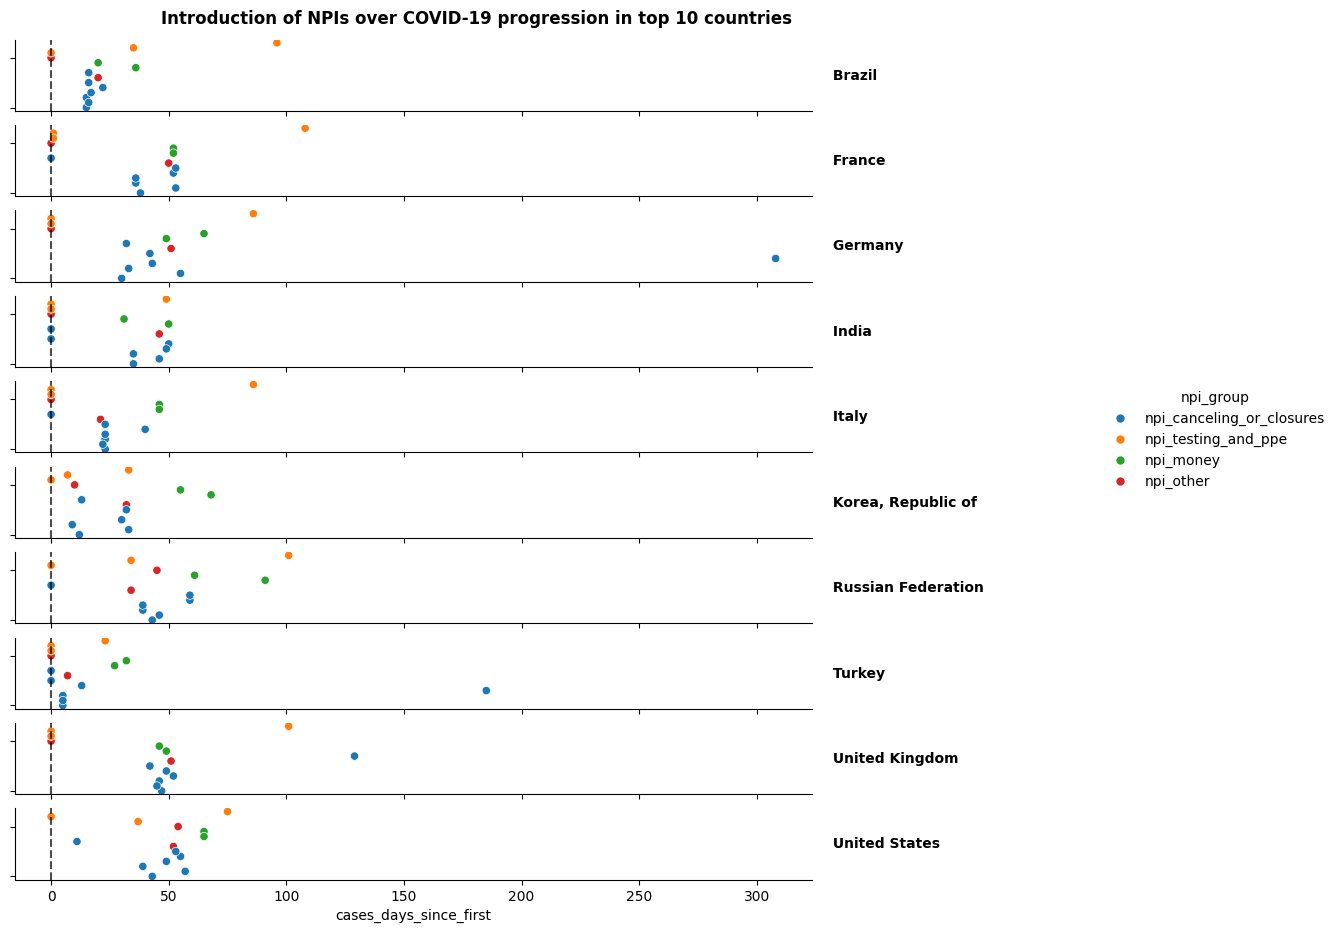

In [14]:
#@title Timeline Plot
## create a list containing the label for each data point
npis = [
        'npi_school_closing',
        'npi_workplace_closing',
        'npi_cancel_public_events',
        'npi_gatherings_restrictions',
        'npi_close_public_transport',
        'npi_stay_at_home',
        'npi_internal_movement_restrictions',
        'npi_international_travel_controls',
        'npi_income_support',
        'npi_debt_relief',
        'npi_public_information',
        'npi_testing_policy',
        'npi_contact_tracing',
        'npi_masks',
]

# Added code starts here
npi_groups = {
    'npi_canceling_or_closures': [
        'npi_school_closing',
        'npi_workplace_closing',
        'npi_cancel_public_events',
        'npi_close_public_transport',
        'npi_gatherings_restrictions',
        'npi_stay_at_home',
        'npi_international_travel_controls',
    ],
    'npi_money': [
        'npi_income_support',
        'npi_debt_relief',
    ],
    'npi_testing_and_ppe': [
        'npi_contact_tracing',
        'npi_masks',
        'npi_testing_policy',
    ],
    'npi_other': [
        'npi_internal_movement_restrictions',
        'npi_public_information',
    ]
}
# Added code ends here

## Get a list containing country_name of ten countries with largest total cases
countries = df.groupby('country_name').cases_total.max().nlargest(10).index
## Create a new dataframe containing only the ten countries with largest total cases, select columns 'country_name' and 'cases_days_since_first', and convert from wide to
## long based on the value of NPI
plot_df = df[df.country_name.isin(countries)][['country_name', 'cases_days_since_first'] + npis].melt(id_vars=['country_name', 'cases_days_since_first'], var_name='NPI')
## Sort the data frame based on 'country_name'. In case of tie, sort the tied data points based on 'cases_days_since_first'
plot_df = plot_df.sort_values(['country_name', 'cases_days_since_first'])
## Filter the data frame to include only data points with positive NPI value, group it based on 'country_name' and 'NPI' while preventing the grouping variable
 # ('country_name' and 'NPI') to become part of the index, and take the minimum of each group.
plot_df = plot_df[plot_df['value'] > 0].groupby(['country_name', 'NPI'], as_index=False).min()

## Add a column 'value' to plot_df which represents the npi name's enumerated index value from npis
plot_df['value'] = plot_df.NPI.map({npi: i for i, npi in enumerate(npis)})

# Added code starts here
npi_to_group_mapping = {npi: group for group, npi_list in npi_groups.items() for npi in npi_list}
plot_df['npi_group'] = plot_df.NPI.map(npi_to_group_mapping)
# Added code ends here

## Create a plot of 'cases_days_since_first' vs 'value'
g = sns.relplot(data=plot_df,
                x='cases_days_since_first',
                y='value',
                hue='npi_group',                  ## edited code: colored by 'NPI' before, now it is colored by 'npi_group'
                row='country_name',         ## separate the plot into multiple plots, one for each 'country_name'
                kind='scatter',             ## draw the plot in form of scatter
                height=1,                   ## specify the height of each plot (for each country) to 1 inch
                aspect=10,                  ## the quantity multiplied by height to give the width of each plot in inches
                marker='o',                 ## specify that each data point is represented by a circle marker in the plot
                facet_kws=dict(margin_titles=True, legend_out=True, despine=True))  ## configure the plot with margin titles, moves the legend outside the plot area, and removing spine from the plots

## Iterates through all subplots (axes) in g (a Seaborn FacetGrid)
for ax in g.axes.flat:
  ## Get the first text element of each ax
  txt = ax.texts[0]
  ## Put a text associated with each subplot and adjust its position and appearance
  ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],   ## get the x and y coordinates of the text relative to its subplot
          txt.get_text().split('=')[1],                                     ## get the text content after the '='
          transform=ax.transAxes,                                           ## specify that the coordinates provided are axes-related coordinates
          va='center',                                                      ## set the vertical alignment to center
          fontweight='bold')                                                ## set the font weight to bold
  ax.texts[0].remove()                      ## remove the first element of each ax.texts
  ax.set_ylabel(None)                       ## remove the y label of each subplot
  ax.set_yticklabels([])                    ## remove the y tick labels of each subplot
  ax.axvline(0, ls='--', c='k', alpha=0.7)  ## add a vertical line at x = 0, ls='--' for dashed line, c='k' for black color, and alpha=0.7 for transparency 0.7

## Add a big bold title at the top of the subplots
g.fig.suptitle('Introduction of NPIs over COVID-19 progression in top 10 countries', fontweight='bold')

## Assign the legend of g to the variable leg
leg = g._legend
## Anchor the bounding box to position [1.05, 0.55]
leg.set_bbox_to_anchor([1.05, 0.55])
## Move the legend closer to the left so it is contained entirely in the figure
sns.move_legend(g, "center right", bbox_to_anchor=(1.2, 0.55))
## Move the plot closer to the top
plt.subplots_adjust(top=0.95)
## Show the plot
plt.show()

###In the DELVE data exploration, they add a widget to allow the user to select only data from a specific country to display. Let's add a widget here and only show the data from one country. It's okay if your country-specific graph is simpler than the ones above (e.g. no dashed horizontal line).

Dropdown(description='Country:', index=23, options=(('Afghanistan', 'Afghanistan'), ('Albania', 'Albania'), ('…

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


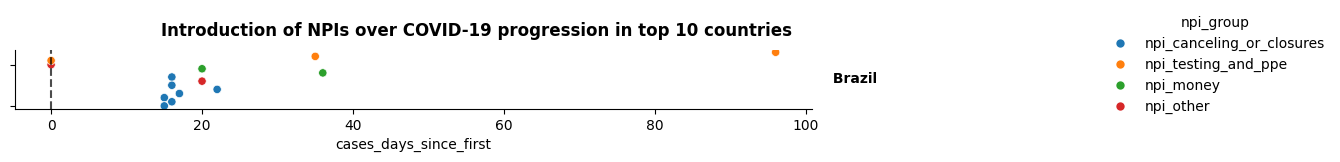

In [15]:
def add_widget(country):
    ## Create a dropdown widget with options from 'country_name" in the DataFrame
    country_widget = widgets.Dropdown(
        options=sorted([(c, c) for c in df.country_name.unique()]),
        value=country,              # set the default value to the provided country
        description='Country:',     # set the label for the dropdown
    )
    # Add an observer to the dropdown widget that calls the plot_country function whenever the value changes
    country_widget.observe(lambda d: plot_country(d['new']), 'value')
    # Display the dropdown widget for country
    display(country_widget)

def plot_country(country):
    clear_output()
    ## Add the widget to the plot
    add_widget(country)
    ## Create a new dataframe containing only the data points with 'country_name' equal to country, select columns 'country_name' and 'cases_days_since_first', and convert from wide to
    ## long based on the value of NPI
    plot0_df = df[df.country_name == country][['country_name', 'cases_days_since_first'] + npis].melt(id_vars=['country_name', 'cases_days_since_first'], var_name='NPI')
    ## Sort the data frame based on 'country_name'. In case of tie, sort the tied data points based on 'cases_days_since_first'
    plot0_df = plot0_df.sort_values(['country_name', 'cases_days_since_first'])
    ## Filter the data frame to include only data points with positive NPI value, group it based on 'country_name' and 'NPI' while preventing the grouping variable
    ## ('country_name' and 'NPI') to become part of the index, and take the minimum of each group.
    plot0_df = plot0_df[plot0_df['value'] > 0].groupby(['country_name', 'NPI'], as_index=False).min()

    ## Add a column 'value' to plot_df which represents the npi name's enumerated index value from npis
    plot0_df['value'] = plot0_df.NPI.map({npi: i for i, npi in enumerate(npis)})

    # Added code starts here
    npi_to_group_mapping = {npi: group for group, npi_list in npi_groups.items() for npi in npi_list}
    plot0_df['npi_group'] = plot_df.NPI.map(npi_to_group_mapping)
    # Added code ends here
    ## Create a plot of 'cases_days_since_first' vs 'value'
    g = sns.relplot(data=plot0_df,   ## pick only the data points with 'country_name' equal to country
                    x='cases_days_since_first',
                    y='value',
                    hue='npi_group',            ## edited code: colored by 'NPI' before, now it is colored by 'npi_group'
                    row='country_name',         ## separate the plot into multiple plots, one for each 'country_name'
                    kind='scatter',             ## draw the plot in form of scatter
                    height=1,                   ## specify the height of each plot (for each country) to 1 inch
                    aspect=10,                  ## the quantity multiplied by height to give the width of each plot in inches
                    marker='o',                 ## specify that each data point is represented by a circle marker in the plot
                    facet_kws=dict(margin_titles=True, legend_out=True, despine=True))  ## configure the plot with margin titles, moves the legend outside the plot area, and removing spine from the plots


    ## Iterates through all subplots (axes) in g (a Seaborn FacetGrid)
    for ax in g.axes.flat:
        ## Get the first text element of each ax
        txt = ax.texts[0]
        ## Put a text associated with each subplot and adjust its position and appearance
        ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],   ## get the x and y coordinates of the text relative to its subplot
                txt.get_text().split('=')[1],                                     ## get the text content after the '='
                transform=ax.transAxes,                                           ## specify that the coordinates provided are axes-related coordinates
                va='center',                                                      ## set the vertical alignment to center
                fontweight='bold')                                                ## set the font weight to bold
        ax.texts[0].remove()                      ## remove the first element of each ax.texts
        ax.set_ylabel(None)                       ## remove the y label of each subplot
        ax.set_yticklabels([])                    ## remove the y tick labels of each subplot
        ax.axvline(0, ls='--', c='k', alpha=0.7)  ## add a vertical line at x = 0, ls='--' for dashed line, c='k' for black color, and alpha=0.7 for transparency 0.7

    ## Add a big bold title at the top of the subplots
    g.fig.suptitle('Introduction of NPIs over COVID-19 progression in top 10 countries', fontweight='bold')

    ## Assign the legend of g to the variable leg
    leg = g._legend
    ## Anchor the bounding box to position [1.05, 0.55]
    leg.set_bbox_to_anchor([1.05, 0.55])
    ## Move the legend closer to the left so it is contained entirely in the figure
    sns.move_legend(g, "center right", bbox_to_anchor=(1.2, 0.55))
    ## Move the plot closer to the top
    plt.subplots_adjust(top=0.7)
    ## Show the plot
    plt.show()

## Create a new dataframe containing only the data points with 'country_name' equal to country, select columns 'country_name' and 'cases_days_since_first', and convert from wide to
## long based on the value of NPI
plot0_df = df[df.country_name == "Brazil"][['country_name', 'cases_days_since_first'] + npis].melt(id_vars=['country_name', 'cases_days_since_first'], var_name='NPI')
## Sort the data frame based on 'country_name'. In case of tie, sort the tied data points based on 'cases_days_since_first'
plot0_df = plot0_df.sort_values(['country_name', 'cases_days_since_first'])
## Filter the data frame to include only data points with positive NPI value, group it based on 'country_name' and 'NPI' while preventing the grouping variable
# ('country_name' and 'NPI') to become part of the index, and take the minimum of each group.
plot0_df = plot0_df[plot0_df['value'] > 0].groupby(['country_name', 'NPI'], as_index=False).min()

## Add a column 'value' to plot_df which represents the npi name's enumerated index value from npis
plot0_df['value'] = plot0_df.NPI.map({npi: i for i, npi in enumerate(npis)})
# Initiate the plot, default to showing only Brazil
plot_country('Brazil')

# Part II: Create your own COVID-19 Data Visualization
* 20 pts for the code + description in this notebook
* 20 pts for the 2 pg summary

###Now find a COVID-19 dataset available online on your own.  Feel free to use whatever data you would like.  If you are having trouble finding data, you can take a look at the sources below:

* The U of T library COVID-19 data resource list: https://mdl.library.utoronto.ca/covid-19/data.

* Google open COVID-19 data repository: https://health.google.com/covid-19/open-data/raw-data.

* Ontario data catalog: https://data.ontario.ca/en/organization/health.

* Kaggle: https://www.kaggle.com.

###Read the data into this notebook and create a figure with a widget that allows users to interact with the graph.  Also, write a caption in the notebook describing the figure you've created.



In [16]:
# URL of the CSV file
csv_url = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/data.csv"

# Use pandas to read the CSV file directly from the URL
my_df = pd.read_csv(csv_url)

In [17]:
# See if there's any missing data for the data we need (day vs cases)
my_df.isna().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

In [18]:
# Conduct Exploratory Data Analysis
my_df.info()
my_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


Dropdown(description='Country:', index=21, options=(('Afghanistan', 'Afghanistan'), ('Albania', 'Albania'), ('…

<ipython-input-19-a8559592a193>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['dateRep'] = pd.to_datetime(country_df['dateRep'], format='%d/%m/%Y')


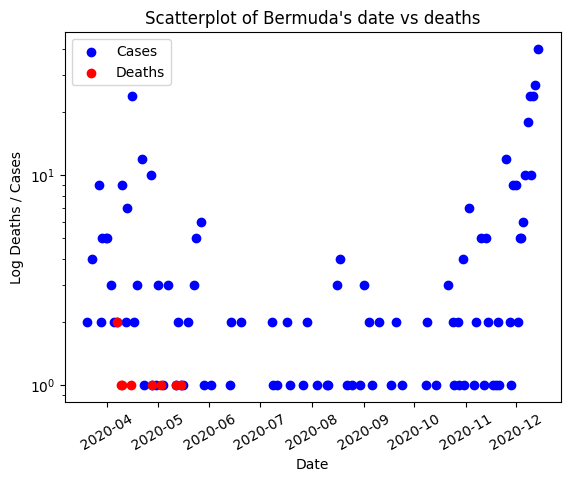

In [19]:
def add_widget1(country):
    ## Create a dropdown widget with options from 'countriesAndTerritories" in the DataFrame
    country_widget = widgets.Dropdown(
        options=sorted([(c, c) for c in my_df.countriesAndTerritories.unique()]),
        value=country,              # set the default value to the provided country
        description='Country:',     # set the label for the dropdown
    )
    # Add an observer to the dropdown widget that calls the plot_country function whenever the value changes
    country_widget.observe(lambda d: plot_country1(d['new']), 'value')
    # Display the dropdown widget for country
    display(country_widget)

def plot_country1(country):
    clear_output()
    ## Add the widget to the plot
    add_widget1(country)
    ## Filter to include only the desired country
    country_df = my_df[my_df.countriesAndTerritories == country]
    ## Convert the 'dateRep' data to datetime format so it can be sorted accordingly
    country_df['dateRep'] = pd.to_datetime(country_df['dateRep'], format='%d/%m/%Y')
    ## Sort the converted 'dateRep' from earliest date to latest date
    country_df = country_df.sort_values(by='dateRep')
    ## Add the 'cases' feature into the scatter plot
    plt.scatter(country_df['dateRep'], country_df['cases'], color='blue', label='Cases')
    ## Create a scatterplot to illustrate the relationship between 'dateRep' and 'deaths'
    plt.scatter(country_df['dateRep'], country_df['deaths'], color='red', label='Deaths')
    ## Set the y-axis to logarithmic scale
    plt.yscale('log')
    ## Give the title of the scatterplot, showed on top of the visualization
    plt.title(f"Scatterplot of {country}'s date vs deaths")
    ## Set the x-label of the scatterplot
    plt.xlabel("Date")
    ## Set the y-label of the scatterplot
    plt.ylabel('Log Deaths / Cases')
    ## Set the rotation of the x-ticks so we can see each x-tick easier
    plt.xticks(rotation=30)
    ## Show the legend
    plt.legend()
    ## Show the scatterplot
    plt.show()

plot_country1('Canada')

### Write a 2-page, double spaced report with the following sections:
* Background: Description of the data you found
* Motivation:  Goal of your visualization
* Methods:  A summary of the visualization you created of the data
* Conclusion: Conclusions or findings indicated by the visualization you have created

### When you are finished, turn in this notebook and the pdf of your report to Quercus.


